In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, IsolationForest, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neural_network import MLPRegressor

 # Data Loading and Exploration

In [19]:
df = pd.read_csv('motorbike_ambulance_calls.csv')

print(df.info())
display(df.head())

print("\nMissing values:")
print(df.isnull().sum())

print("\nSummary statistics:")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       17379 non-null  int64  
 1   date        17379 non-null  object 
 2   season      17379 non-null  object 
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(9), object(2)
memory usage: 2.0+ MB
None


,index,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1/1/11,spring,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2,1/1/11,spring,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,3,1/1/11,spring,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,4,1/1/11,spring,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,5,1/1/11,spring,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1



Missing values:
index         0
date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

Summary statistics:
            index            yr          mnth            hr       holiday  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      0.502561      6.537775     11.546752      0.028770   
std     5017.0295      0.500008      3.438776      6.914405      0.167165   
min        1.0000      0.000000      1.000000      0.000000      0.000000   
25%     4345.5000      0.000000      4.000000      6.000000      0.000000   
50%     8690.0000      1.000000      7.000000     12.000000      0.000000   
75%    13034.5000      1.000000     10.000000     18.000000      0.000000   
max    17379.0000      1.000000     12.000000     23.000000      1.000000   

            wee

In [20]:
data= df.drop(columns=['index'])

# Data Preprocessing

In [21]:
data['date'] = pd.to_datetime(data['date'])

data['day'] = data['date'].dt.day
data['hour'] = data['hr']
data['year'] = data['yr'].map({0: 2011, 1: 2012})

categorical_columns = ['season', 'holiday', 'weekday', 'workingday', 'weathersit']
for col in categorical_columns:
    data[col] = data[col].astype('category')

data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

print(data_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           17379 non-null  datetime64[ns]
 1   yr             17379 non-null  int64         
 2   mnth           17379 non-null  int64         
 3   hr             17379 non-null  int64         
 4   temp           17379 non-null  float64       
 5   atemp          17379 non-null  float64       
 6   hum            17379 non-null  float64       
 7   windspeed      17379 non-null  float64       
 8   cnt            17379 non-null  int64         
 9   day            17379 non-null  int32         
 10  hour           17379 non-null  int64         
 11  year           17379 non-null  int64         
 12  season_spring  17379 non-null  bool          
 13  season_summer  17379 non-null  bool          
 14  season_winter  17379 non-null  bool          
 15  holiday_1      1737

<ipython-input-21-d8d691511fbc>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date'] = pd.to_datetime(data['date'])


This code converts the date column to datetime, extracts relevant features like day, hour, and year, and encodes categorical variables using one-hot encoding. These steps prepare the data for analysis by ensuring the proper format for both numerical and categorical features, optimizing memory usage, and making the dataset suitable for machine learning models.

# Data Visualization and Analysis

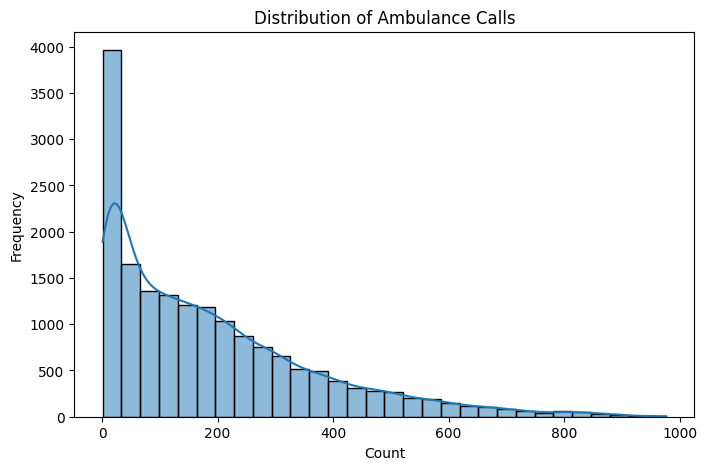

<ipython-input-22-aac2ad2a1b7c>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x="hour", y="cnt", hue="season", ci=None)


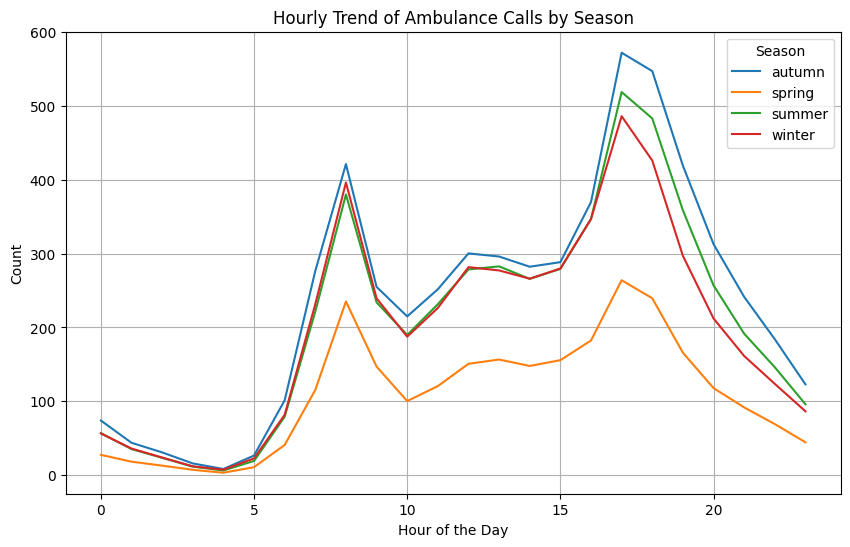

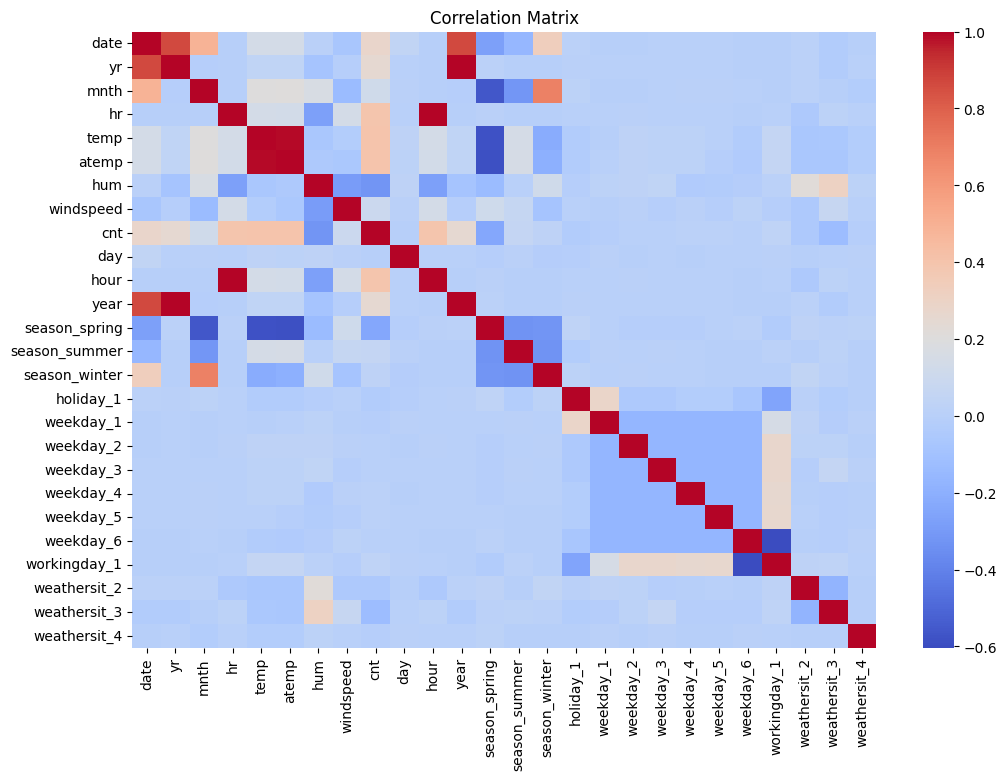

In [22]:
plt.figure(figsize=(8, 5))
sns.histplot(data['cnt'], bins=30, kde=True)
plt.title("Distribution of Ambulance Calls")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x="hour", y="cnt", hue="season", ci=None)
plt.title("Hourly Trend of Ambulance Calls by Season")
plt.xlabel("Hour of the Day")
plt.ylabel("Count")
plt.legend(title="Season")
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(data_encoded.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

he third plot displays a correlation matrix of the encoded dataset, helping to identify relationships between variables. The heatmap uses a "coolwarm" color palette to highlight the strength of correlations.

These visualizations are useful for understanding the data's distribution, trends over time, and relationships between features, which can inform further analysis and modeling.

<ipython-input-14-56070b66ec2c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=calls_by_time, x='time_of_day', y='cnt', palette=['orange', 'blue'])


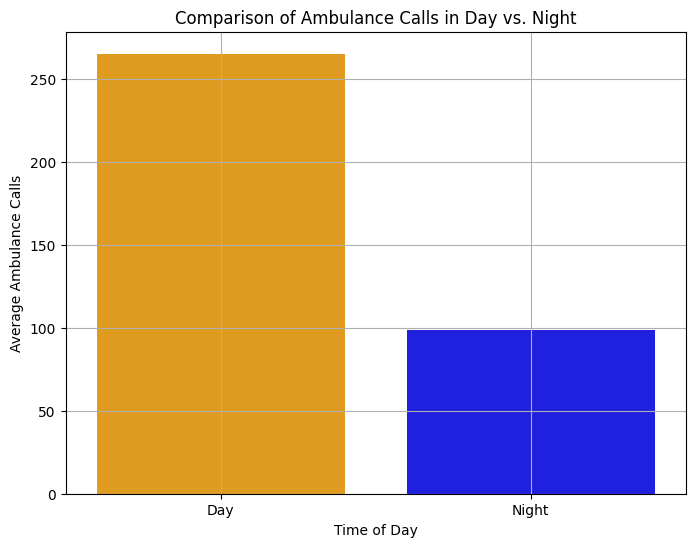

In [14]:
def categorize_time(hour):
    return "Day" if 6 <= hour <= 18 else "Night"

data['time_of_day'] = data['hour'].apply(categorize_time)

calls_by_time = data.groupby('time_of_day')['cnt'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=calls_by_time, x='time_of_day', y='cnt', palette=['orange', 'blue'])
plt.title('Comparison of Ambulance Calls in Day vs. Night')
plt.xlabel('Time of Day')
plt.ylabel('Average Ambulance Calls')
plt.grid(True)
plt.show()

 a bar plot is created to visually compare the average number of ambulance calls during the day and night, using distinct colors

# Regression Modeling

In [9]:
X = data_encoded.drop(columns=['cnt', 'date'])
y = data_encoded['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

print("Linear Regression:")
print(f"RMSE: {mean_squared_error(y_test, y_pred_lr, squared=False):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred_lr):.2f}")

print("\nRandom Forest Regressor:")
print(f"RMSE: {mean_squared_error(y_test, y_pred_rf, squared=False):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred_rf):.2f}")

Linear Regression:
RMSE: 137.69
R2 Score: 0.40

Random Forest Regressor:
RMSE: 40.71
R2 Score: 0.95


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


This code performs regression using two models: Linear Regression and Random Forest Regressor. Random Forest Regressor is clearly the better model in this case, both in terms of RMSE and R² score. The Random Forest model provides a significantly lower RMSE and a much higher R² score.

In [16]:
rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score (MSE):", best_score)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Optimized Random Forest Results:")
print(f"MSE: {mse}")
print(f"R2 Score: {r2}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score (MSE): 1756.3360571873968
Optimized Random Forest Results:
MSE: 1644.9693328646727
R2 Score: 0.9480515406736308


performing grid search with the RandomForestRegressor and evaluating the model

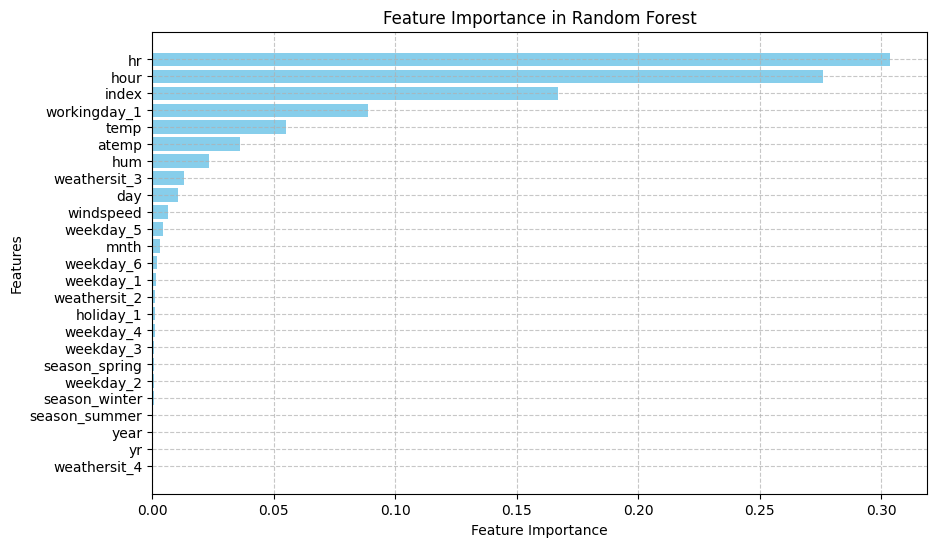

In [23]:
feature_importances = best_rf.feature_importances_

feature_names = X_train.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Feature importance helps you understand which features are most influential in predicting the target variable. Identifying key features allows you to optimize the model by focusing on the most impactful inputs.

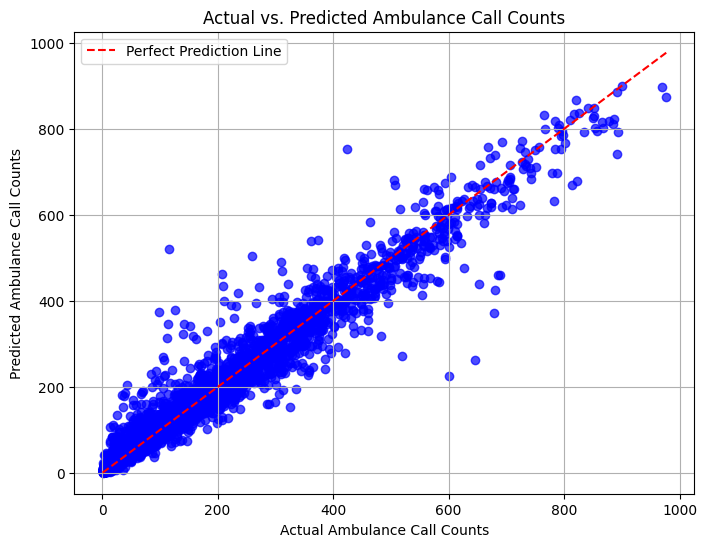

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Perfect Prediction Line")
plt.xlabel("Actual Ambulance Call Counts")
plt.ylabel("Predicted Ambulance Call Counts")
plt.title("Actual vs. Predicted Ambulance Call Counts")
plt.legend()
plt.grid(True)
plt.show()

The red dashed line acts as a reference for perfect predictions, helping to identify discrepancies between actual and predicted values. Points located close to the ideal prediction, indicating high accuracy of the model.

Gradient Boosting - MSE: 4240.71, R2 Score: 0.87


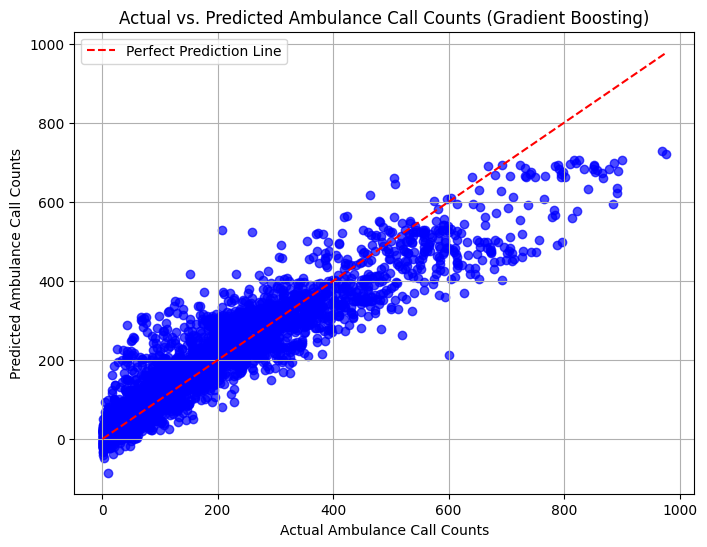

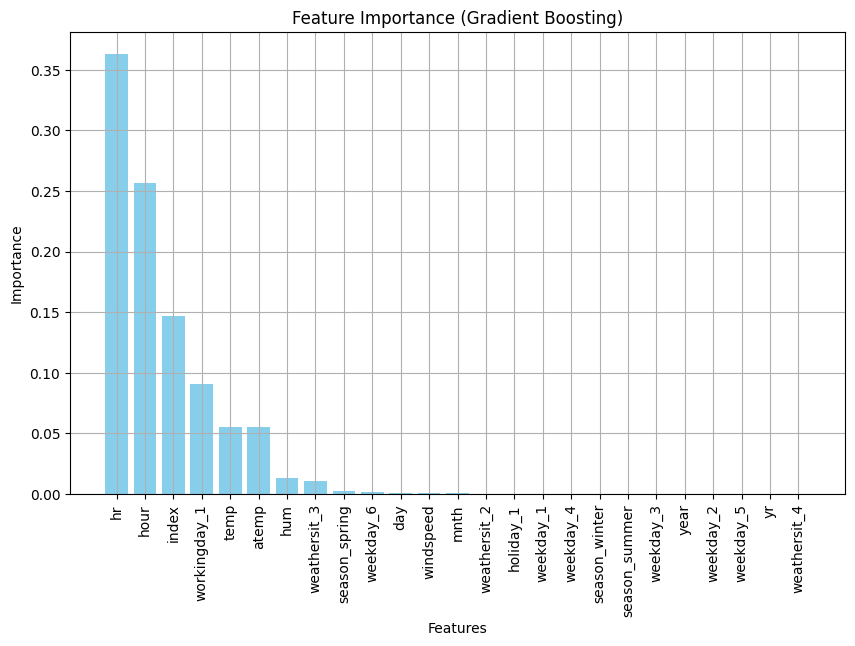

AdaBoost - MSE: 11677.32, R2 Score: 0.63


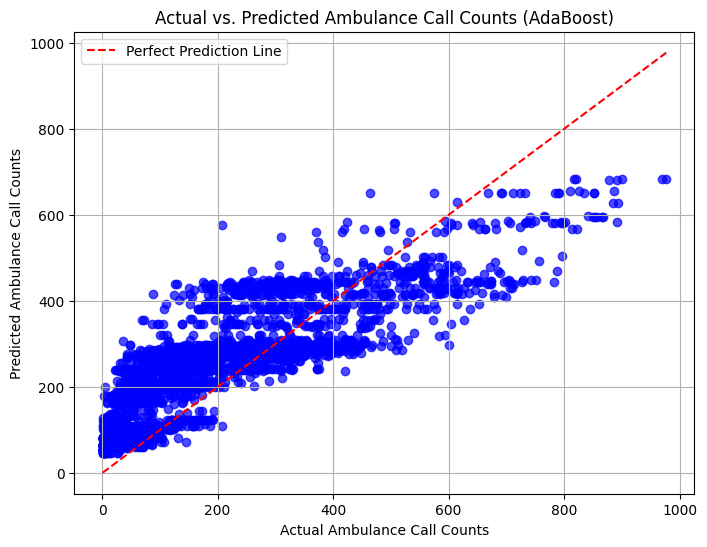

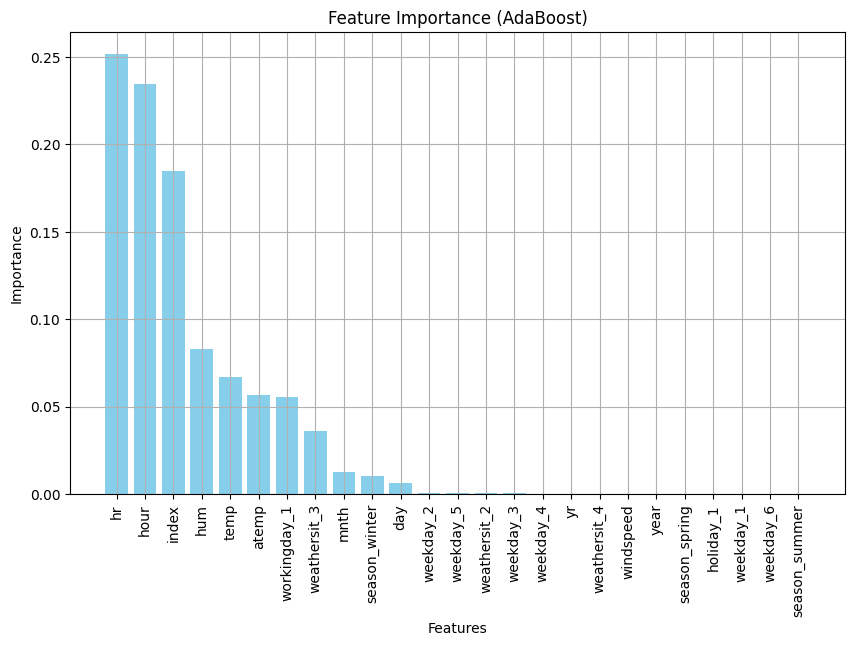

XGBoost - MSE: 1394.60, R2 Score: 0.96


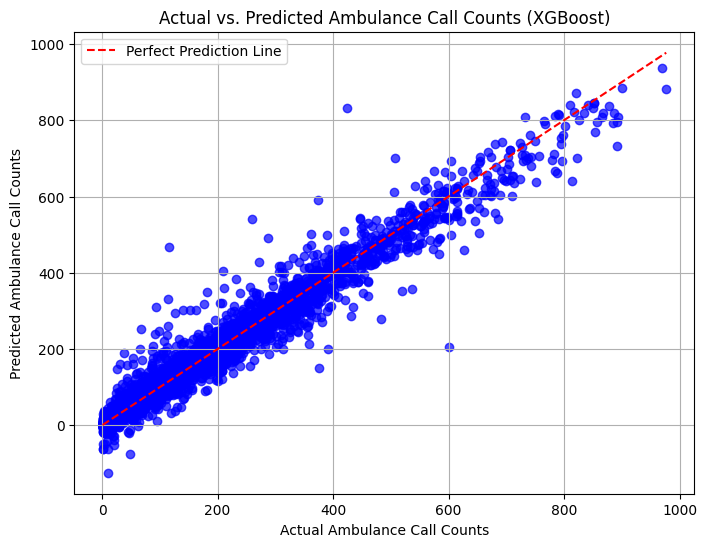

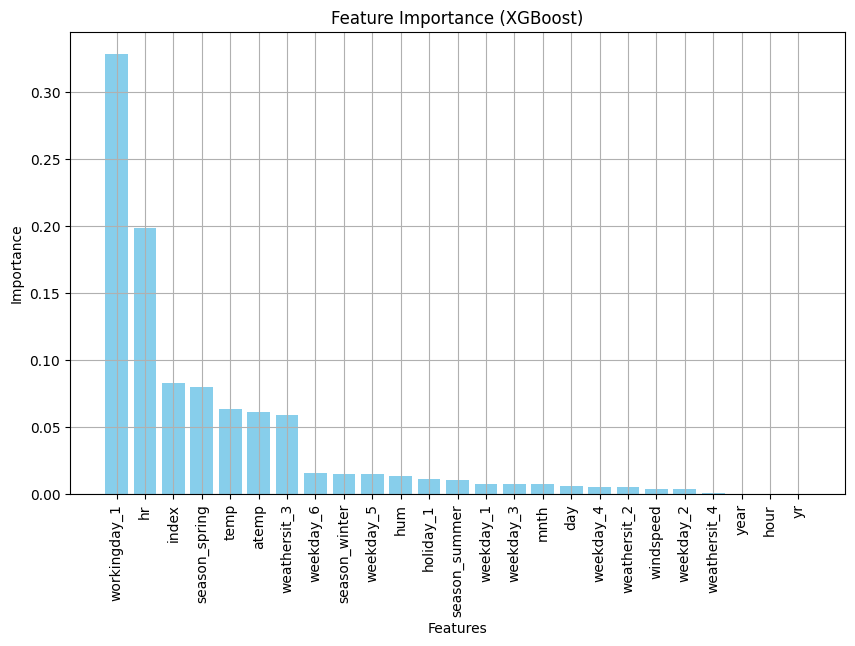

In [36]:
models = {
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, objective="reg:squarederror")
}

for model_name, model in models.items():

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{model_name} - MSE: {mse:.2f}, R2 Score: {r2:.2f}")
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Perfect Prediction Line")
    plt.xlabel("Actual Ambulance Call Counts")
    plt.ylabel("Predicted Ambulance Call Counts")
    plt.title(f"Actual vs. Predicted Ambulance Call Counts ({model_name})")
    plt.legend()
    plt.grid(True)
    plt.show()

    feature_importances = model.feature_importances_
    sorted_idx = np.argsort(feature_importances)[::-1]
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(feature_importances)), feature_importances[sorted_idx], align="center", color="skyblue")
    plt.xticks(range(len(feature_importances)), np.array(X_train.columns)[sorted_idx], rotation=90)
    plt.xlabel("Features")
    plt.ylabel("Importance")
    plt.title(f"Feature Importance ({model_name})")
    plt.grid(True)
    plt.show()

out off all these three models XGBoost shows the best results

 # Anomaly Detection

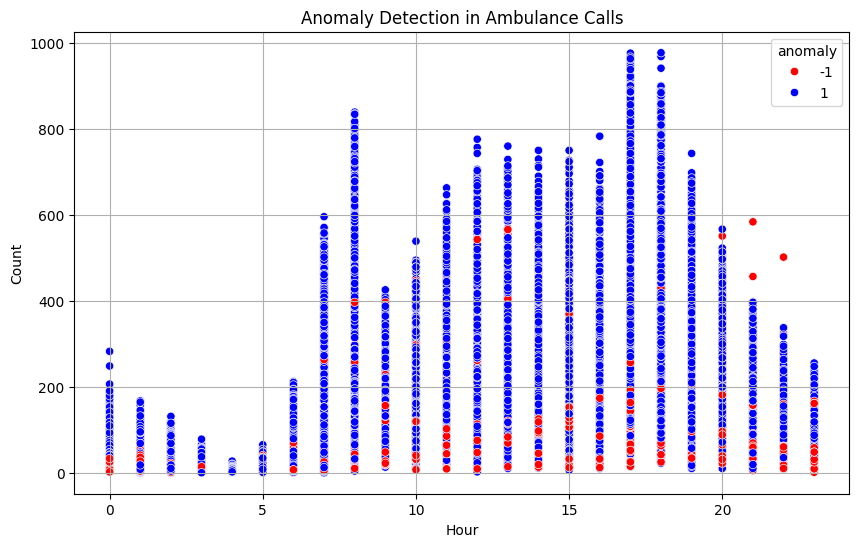

anomaly
 1    16510
-1      869
Name: count, dtype: int64


In [13]:
iso_forest = IsolationForest(contamination=0.05, random_state=42)
data_encoded['anomaly'] = iso_forest.fit_predict(data_encoded.drop(columns=['cnt', 'date']))

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_encoded, x="hour", y="cnt", hue="anomaly", palette={-1: 'red', 1: 'blue'})
plt.title("Anomaly Detection in Ambulance Calls")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.grid(True)
plt.show()

print(data_encoded['anomaly'].value_counts())

The scatter plot allows you to visually identify anomalies based on ambulance calls across different hours of the day

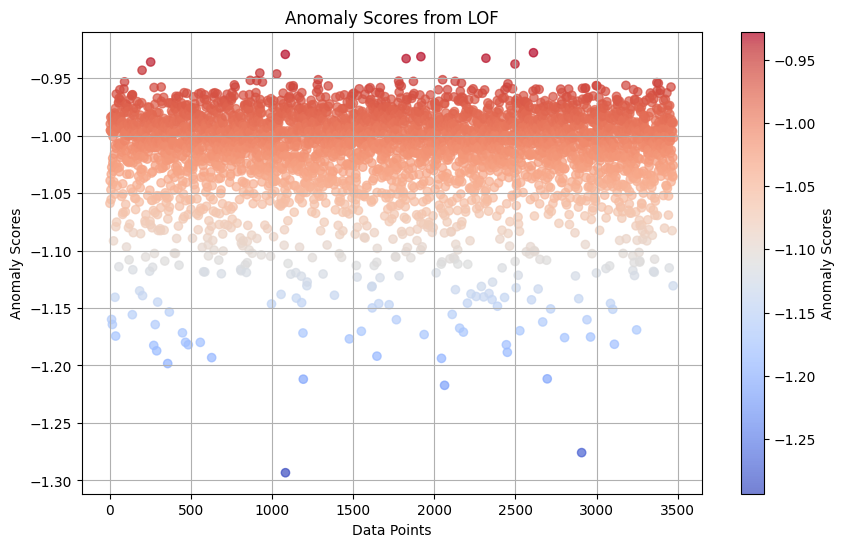

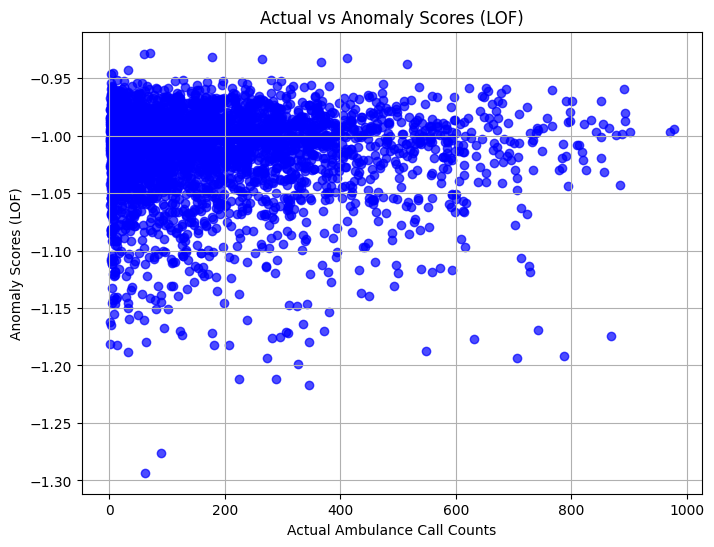

In [39]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred_lof = lof.fit_predict(X_test)
anomaly_scores = lof.negative_outlier_factor_

plt.figure(figsize=(10, 6))
plt.scatter(range(len(anomaly_scores)), anomaly_scores, c=anomaly_scores, cmap='coolwarm', alpha=0.7)
plt.colorbar(label="Anomaly Scores")
plt.xlabel("Data Points")
plt.ylabel("Anomaly Scores")
plt.title("Anomaly Scores from LOF")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test, anomaly_scores, alpha=0.7, color="blue")
plt.xlabel("Actual Ambulance Call Counts")
plt.ylabel("Anomaly Scores (LOF)")
plt.title("Actual vs Anomaly Scores (LOF)")
plt.grid(True)
plt.show()

LOF identifies anomalous data points by analyzing the local density of data, which is useful when you suspect that some ambulance calls are outliers. most points have anomaly scores close to -1, it indicates that most of the data points are considered normal by LOF

#Sugeestions on the further  analytics/approaches which could be applied

Investigate the relationship between weather conditions and ambulance calls, and explore event-based anomalies (e.g., local festivals, accidents) to understand external factors driving call volumes.

Use Autoencoders to detect more complex anomalies in ambulance call patterns, offering a more robust approach for identifying outliers in high-dimensional data.